# Machine Learning Engineer Nanodegree
### Project : Using Supervised Learning to identify whether an individual is diabetic or not with respect to its features.
In this fast-growing world, although the technology had advanced a lot there are many health problems raising at an alarming rate.his problem should be addressed because many people are losing their lives because they haven’t realized at the earlier time.So, I selected one of the most common diseases diabetes. Using the data, we can identify or predict a person whether he is having diabetes are not. This might help the persons to take precautions as they can identify it earlier because it has become common and unlike past days it is not specified to only some particular age, so we can identify it earlier.


## Exploring the data

In [232]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline

data = pd.read_csv("data.csv")
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [233]:
n_records = data['Outcome'].count()

n_diabetic = data['Outcome'].loc[data['Outcome'] == 1].count()
n_non_diabetic = data['Outcome'].loc[data['Outcome'] == 0].count()

diabetic_percent = (float)(n_diabetic*100)/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("No of Diabetic : {}".format(n_diabetic))
print("No of non diabetic {}".format(n_non_diabetic))
print("Percentage of diabetic {}%".format(diabetic_percent))

Total number of records: 768
No of Diabetic : 268
No of non diabetic 500
Percentage of diabetic 34.8958333333%


# Features 

Features Used here are:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)


In [234]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualize

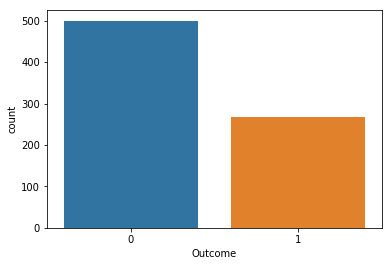

In [235]:
sns.countplot(x="Outcome", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029F6EEB8>,
      dtype=object)

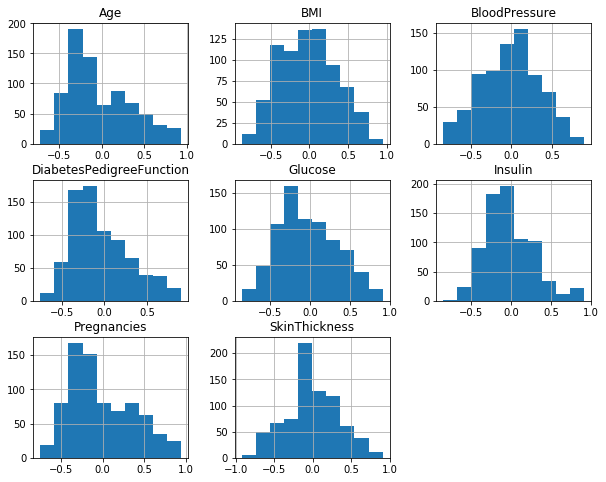

In [236]:
features.hist(figsize=(10,8))

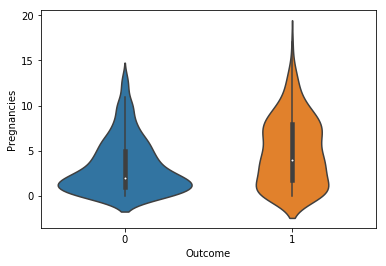

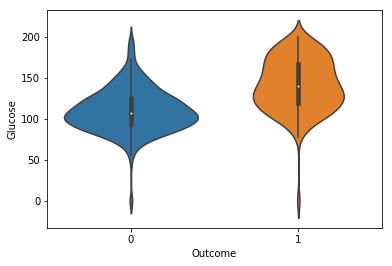

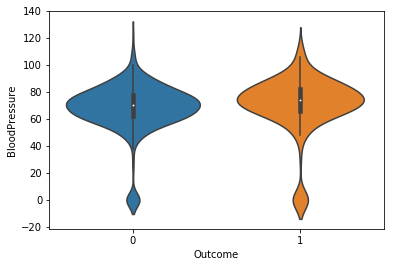

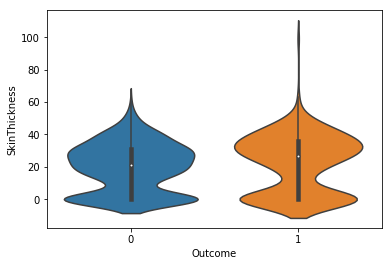

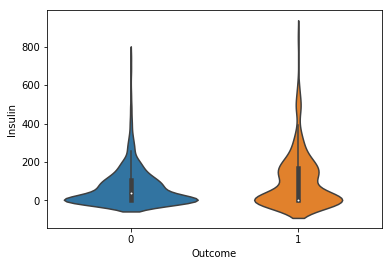

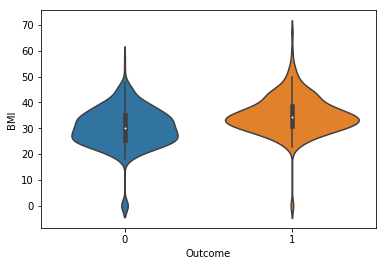

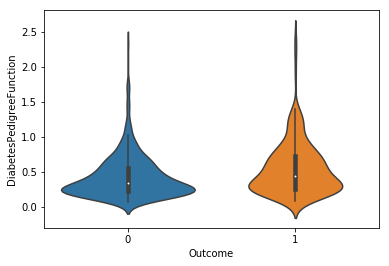

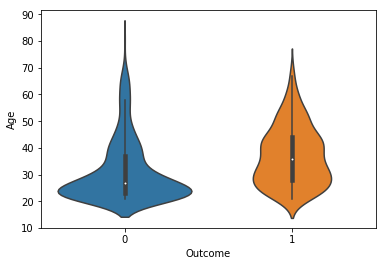

In [237]:
for col in features:
    fig, ax = plt.subplots()
    sns.violinplot(data["Outcome"],data[col])

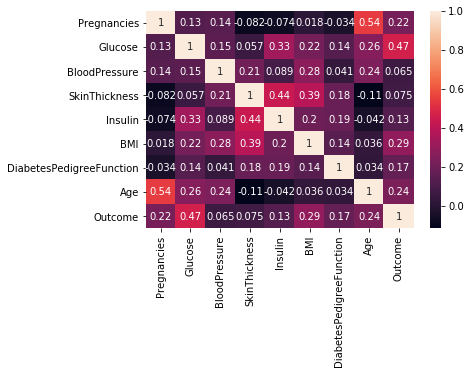

In [238]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)

## Preprocessing

First thing I observed from the above visualizations is that some features has many zero points. This may affect the accuracy so they must be cleaned.

In [239]:
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(data, col, 'Outcome')    

In [252]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [ ]:
features = data.drop('Outcome' , axis=1)
Outcome = data['Outcome']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002BEFA860>,
      dtype=object)

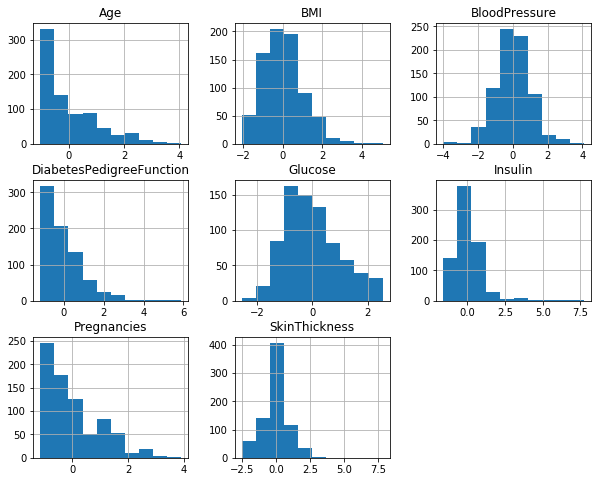

In [241]:
from sklearn.preprocessing import StandardScaler
 
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']

features_log_minmax = pd.DataFrame(data = features)
features_log_minmax[numerical] = StandardScaler().fit_transform(features[numerical])
features_log_minmax.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C60EB38>,
      dtype=object)

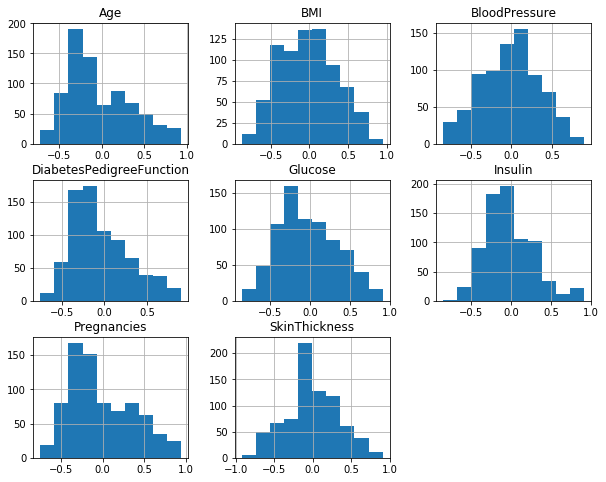

In [242]:
from sklearn.preprocessing import normalize

fea_nor = pd.DataFrame(data=features_log_minmax)
fea_nor[numerical] = normalize(features_log_minmax[numerical])

fea_nor.hist(figsize=(10,8))

## Shuffle and Split data

In [243]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fea_nor, 
                                                    Outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


## Model Evaluation

In [244]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
def model_eval(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)

    train_accuracy = accuracy_score(y_train,pred_train)

    test_accuracy = accuracy_score(y_test,pred_test)

    train_fscore = fbeta_score(y_train,pred_train,beta=0.5)
    test_fscore = fbeta_score(y_test,pred_test,beta=0.5)
    
    print("Accuracy : train : {} , test : {}".format(train_accuracy,test_accuracy))
    print("F-score : train : {} , test : {}".format(train_fscore,test_fscore))

# BenchMark model

In [245]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_eval(model,X_train,y_train,X_test,y_test)

Accuracy : train : 0.809446254072 , test : 0.857142857143
F-score : train : 0.743440233236 , test : 0.749063670412


# RandomForest

In [253]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_eval(model,X_train,y_train,X_test,y_test)

Accuracy : train : 0.990228013029 , test : 0.850649350649
F-score : train : 0.989061075661 , test : 0.757575757576


# AdaBoost

In [254]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model_eval(model,X_train,y_train,X_test,y_test)

Accuracy : train : 0.910423452769 , test : 0.88961038961
F-score : train : 0.882079851439 , test : 0.798479087452


# K Nearest Neighbours

In [255]:
from sklearn.neighbors  import KNeighborsClassifier

model = KNeighborsClassifier()
model_eval(model,X_train,y_train,X_test,y_test)

Accuracy : train : 0.861563517915 , test : 0.850649350649
F-score : train : 0.816714150047 , test : 0.753138075314


## Model Tuning

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME')
parameters = { 'n_estimators':[50,100,300,500] ,'learning_rate':[0.02,0.25,0.1,0.3]  }

scorer = make_scorer(fbeta_score , beta=0.4)


grid_obj = GridSearchCV(clf,parameters,scorer)

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Optimized Model
------
Final accuracy score on the testing data: 0.88961038961
Final F-score on the testing data: 0.803921568627


## Feature Importance

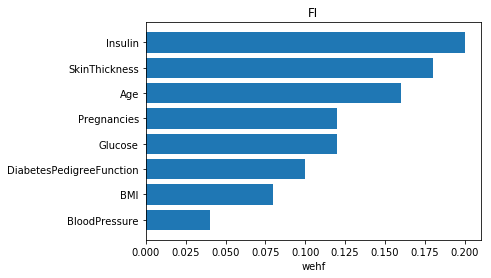

In [250]:
CL = AdaBoostClassifier()
fi = CL.fit(X_train,y_train)
imp = fi.feature_importances_
cols = X_train.columns.values
cols = [x for _,x in sorted(zip(imp,cols))]
ind = np.argsort(imp)
plt.title('FI')
plt.barh(range(len(ind)),imp[ind])
plt.yticks(range(len(ind)),cols)
plt.xlabel('wehf')
plt.show()

In [251]:
X_train_im = X_train.drop(['BMI','BloodPressure'],axis=1)
X_test_im = X_test.drop(['BMI','BloodPressure'],axis=1)

model = AdaBoostClassifier()
model_eval(model,X_train_im,y_train,X_test_im,y_test)

Accuracy : train : 0.897394136808 , test : 0.883116883117
F-score : train : 0.863509749304 , test : 0.791505791506


# Conclusion

AdaBoost Classifier is the best model for this data among all other models with following parameters: 
- n-estimators, learning_rate
- We are getting an F1_score of 0.803921568627 considering all the features because if only some features are used definetely result may decrease a little bit. 